Importing Libraries and Loading Data

In [95]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# Load the dataset
df = pd.read_csv('/Users/yashikasharma/Downloads/COVID clinical trials.csv')

Initial EDA

In [97]:
# View the first few rows of the datasdet
print(df.head())

   Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

        Acronym                  Status         Study Results  \
0   COVID-IDNow  Active, not recruiting  No Results Available   
1      COVID-19      Not yet recruiting  No Results Available   
2   TAC-COVID19              Recruiting  No Results Available   
3      COVID-19  Active, not recruiting  No Results Available   
4  TMF-COVID-19              Recruiting  No Results Available   

                                          Conditions  \
0                                            Covid19   
1                               SARS-CoV-2 Inf

In [98]:
#Shape of the dataset
df.shape

(5783, 27)

In [99]:
# Columns in the dataset
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [100]:
# Categorical Features
df.select_dtypes(include ='object').columns

Index(['NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Funded Bys',
       'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [101]:
# Numerical Features
df.select_dtypes(exclude ='object').columns

Index(['Rank', 'Enrollment'], dtype='object')

In [102]:
# Check the columns and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [103]:
# Summary statistics for numerical columns
print(df.describe())

              Rank    Enrollment
count  5783.000000  5.749000e+03
mean   2892.000000  1.831949e+04
std    1669.552635  4.045437e+05
min       1.000000  0.000000e+00
25%    1446.500000  6.000000e+01
50%    2892.000000  1.700000e+02
75%    4337.500000  5.600000e+02
max    5783.000000  2.000000e+07


In [104]:
# Summary statistics for categorical columns
print(df.describe(include='object'))

         NCT Number                                              Title  \
count          5783                                               5783   
unique         5783                                               5775   
top     NCT04785898  Study Assessing Vagus Nerve Stimulation in CoV...   
freq              1                                                  2   

         Acronym      Status         Study Results Conditions  \
count       2480        5783                  5783       5783   
unique      2338          12                     2       3067   
top     COVID-19  Recruiting  No Results Available   COVID-19   
freq          47        2805                  5747        720   

                 Interventions Outcome Measures  \
count                     4897             5748   
unique                    4337             5687   
top     Other: No intervention        Mortality   
freq                        32                5   

                          Sponsor/Collaborators

In [105]:
# Before Dropping Duplicates
print(f"Shape before dropping duplicates data {df.shape}")

# Convert any list columns to strings before dropping duplicates
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, list)).any():
        df[col] = df[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Now drop duplicates
df.drop_duplicates(inplace=True)
print(f"Shape after dropping duplicates data {df.shape}")

Shape before dropping duplicates data (5783, 27)
Shape after dropping duplicates data (5783, 27)


Handling Missing Data

In [106]:
# Check for missing values
print(df.isnull().sum())

Rank                          0
NCT Number                    0
Title                         0
Acronym                    3303
Status                        0
Study Results                 0
Conditions                    0
Interventions               886
Outcome Measures             35
Sponsor/Collaborators         0
Gender                       10
Age                           0
Phases                     2461
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                35
Other IDs                     1
Start Date                   34
Primary Completion Date      36
Completion Date              36
First Posted                  0
Results First Posted       5747
Last Update Posted            0
Locations                   585
Study Documents            5601
URL                           0
dtype: int64


In [107]:
# Detecting (Percentage) Missing Data
missing_data = df.isnull().mean() * 100
missing_data

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                    57.115684
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  0.587930
Primary Completion Date     0.622514
Completion Date             0.622514
First Posted                0.000000
Results First Posted       99.377486
Last Update Posted          0.000000
Locations                  10.115857
Study Documents            96.852845
URL                         0.000000
d

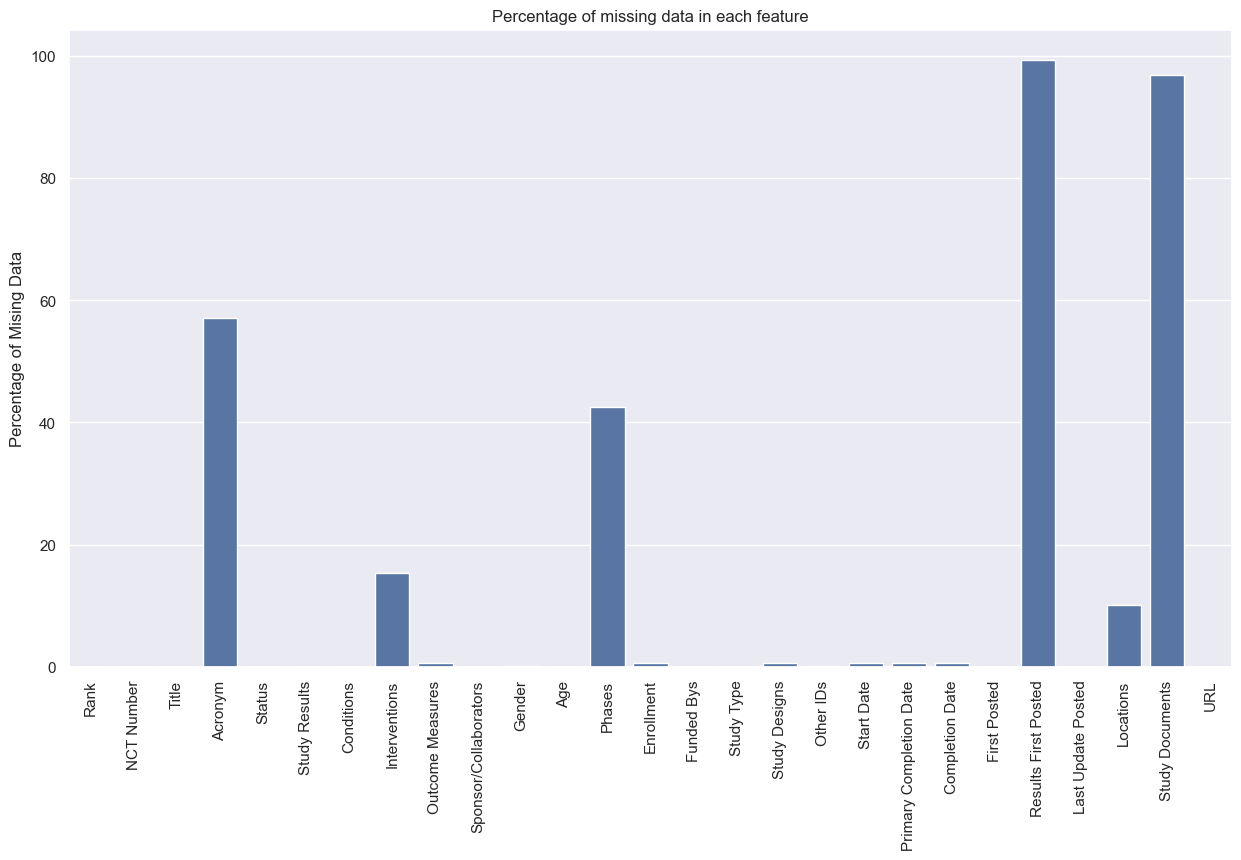

In [108]:
# Visualize data without calculating
def visualize_data(data, caption='', ylabel='Percentage of Mising Data'):
    # set figure size
    sns.set(rc={'figure.figsize':(15,8.27)})
    # make ticks vertical
    plt.xticks(rotation=90)
    # set title to the image and plot it or the highest 40
    fig = sns.barplot(x=data.keys()[:min(40, len(data))].tolist(), 
                     y=data.values[:min(40, len(data))].tolist())  
    fig.set_title(caption)  # Set title as a separate statement
    # set labels
    plt.ylabel(ylabel)
    plt.show()
visualize_data(missing_data ,'Percentage of missing data in each feature')

In [109]:
# remove unnecessary columns
df = df.drop(['Rank', 'Study Results', 'Other IDs', 'First Posted', 'Results First Posted', 'Last Update Posted', 'Study Documents'], axis=1)

In [110]:
# Countries from location
countries = [ str(df.Locations.iloc[i]).split(',')[-1] for i in range(df.shape[0])]
df['Country']= countries
df.Country.value_counts()[:35]

Country
 United States          1267
 France                  647
nan                      585
 United Kingdom          306
 Italy                   235
 Spain                   234
 Turkey                  219
 Canada                  202
 Egypt                   192
 China                   171
 Brazil                  137
 Germany                 128
 Belgium                  91
 Mexico                   88
 Switzerland              76
 Russian Federation       69
 Sweden                   57
 Denmark                  56
 Israel                   56
 India                    55
 Pakistan                 53
 Argentina                47
 Netherlands              46
 Norway                   38
 Hong Kong                36
 Colombia                 33
 Republic of              31
 Austria                  29
 Poland                   29
 Singapore                29
 Saudi Arabia             27
 Australia                26
 Greece                   26
 Islamic Republic of      23
 South

In [111]:
# Classifying missing data
#starting from acronym
print(f"Number of unique values is {df.Acronym.nunique()} \n")
df.Acronym.value_counts()

Number of unique values is 2338 



Acronym
COVID-19        47
PROTECT          7
CORONA           6
RECOVER          5
SCOPE            5
                ..
ASD              1
VICO             1
LICORNE          1
LOSVID           1
MindMyMindFU     1
Name: count, Length: 2338, dtype: int64

In [112]:
# Find the relation between null values in Acronym and Countries
(df.Acronym.isnull().groupby(df.Country).mean().sort_values(ascending= False) * 100)[:60]

Country
 Iraq                      100.000000
 Belarus                   100.000000
 Rwanda                    100.000000
 South Sudan               100.000000
 Cambodia                  100.000000
 Bulgaria                  100.000000
 Cyprus                    100.000000
 Bosnia and Herzegovina    100.000000
 Guinea-Bissau             100.000000
 Dominican Republic        100.000000
 Ecuador                   100.000000
 North Macedonia           100.000000
 Bahrain                   100.000000
 Azerbaijan                100.000000
 Uruguay                   100.000000
 Uzbekistan                100.000000
 Kyrgyzstan                100.000000
 Cape Verde                100.000000
 Republic of                96.774194
 Taiwan                     93.750000
 Singapore                  93.103448
 Japan                      88.888889
 Kuwait                     87.500000
 China                      87.134503
 Turkey                     86.757991
 Ukraine                    85.714286
 Mal

In [113]:
# impute by a missing Indicator
df.Acronym = df.Acronym.fillna("Missing Acronym")

In [114]:
# Detecting (Percentage) Missing Data
df.isnull().mean() * 100

NCT Number                  0.000000
Title                       0.000000
Acronym                     0.000000
Status                      0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Start Date                  0.587930
Primary Completion Date     0.622514
Completion Date             0.622514
Locations                  10.115857
URL                         0.000000
Country                     0.000000
dtype: float64

In [115]:
# Impute Interventions , Phases , Locations by Missing Category
categorical_features = df.select_dtypes(include =object).columns
features =categorical_features[df[categorical_features].isnull().mean() >0]
for feature in features:
    df[feature]= df[feature].fillna(f"Missing {feature}")

In [116]:
# Detecting (Percentage) Missing Data
df.isnull().mean() * 100

NCT Number                 0.00000
Title                      0.00000
Acronym                    0.00000
Status                     0.00000
Conditions                 0.00000
Interventions              0.00000
Outcome Measures           0.00000
Sponsor/Collaborators      0.00000
Gender                     0.00000
Age                        0.00000
Phases                     0.00000
Enrollment                 0.58793
Funded Bys                 0.00000
Study Type                 0.00000
Study Designs              0.00000
Start Date                 0.00000
Primary Completion Date    0.00000
Completion Date            0.00000
Locations                  0.00000
URL                        0.00000
Country                    0.00000
dtype: float64

In [117]:
# Check the skewness
df.Enrollment.skew()

34.06593382031148

<Axes: ylabel='Density'>

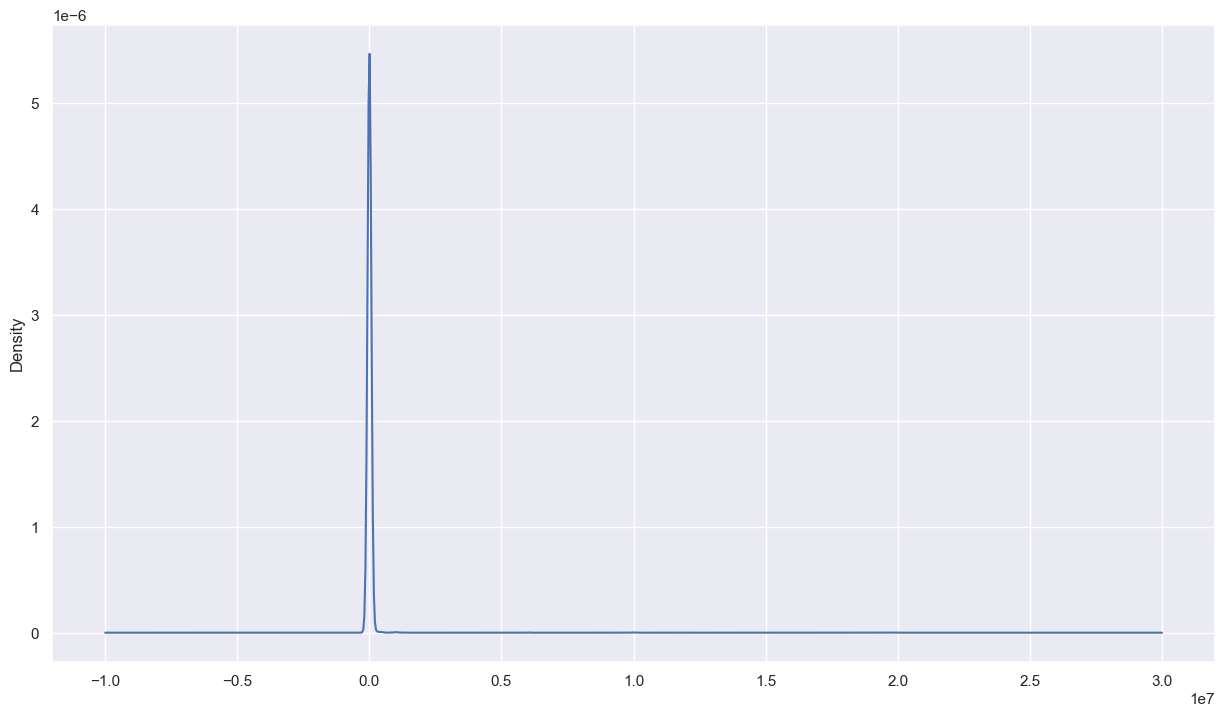

In [118]:
# Plotting the distribution of the enrollment
df.Enrollment.plot(kind='kde')

In [119]:
# Some Statstical Valuse for the Enrollment Column
min_Value = df.Enrollment.min()
max_Value = df.Enrollment.max()
mean_Value = df.Enrollment.mean()
median_Value = df.Enrollment.median()
std_Value = df.Enrollment.std()
print(f"the min value is {min_Value} \n \
The max value is {max_Value} \n \
The mean is {mean_Value} \n \
The Median is {median_Value} \n \
Standard Devation is {std_Value}")

the min value is 0.0 
 The max value is 20000000.0 
 The mean is 18319.48860671421 
 The Median is 170.0 
 Standard Devation is 404543.7287841079


In [120]:
# Using Median to impute Missing Values
df.Enrollment = df.Enrollment.fillna(median_Value)

In [121]:
# Detecting (Percentage) Missing Data
df.isnull().mean() * 100

NCT Number                 0.0
Title                      0.0
Acronym                    0.0
Status                     0.0
Conditions                 0.0
Interventions              0.0
Outcome Measures           0.0
Sponsor/Collaborators      0.0
Gender                     0.0
Age                        0.0
Phases                     0.0
Enrollment                 0.0
Funded Bys                 0.0
Study Type                 0.0
Study Designs              0.0
Start Date                 0.0
Primary Completion Date    0.0
Completion Date            0.0
Locations                  0.0
URL                        0.0
Country                    0.0
dtype: float64

In [122]:
df.head()

,NCT Number,Title,Acronym,Status,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,Age,...,Enrollment,Funded Bys,Study Type,Study Designs,Start Date,Primary Completion Date,Completion Date,Locations,URL,Country
0,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,All,"18 Years and older (Adult, Older Adult)",...,1000.0,Other,Interventional,Allocation: N/A|Intervention Model: Single Gro...,"November 9, 2020","December 22, 2020","April 30, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",https://ClinicalTrials.gov/show/NCT04785898,France
1,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,All,"18 Years and older (Adult, Older Adult)",...,60.0,Other,Interventional,Allocation: Randomized|Intervention Model: Par...,"November 2, 2020","December 15, 2020","January 29, 2021","Cimedical, Barranquilla, Atlantico, Colombia",https://ClinicalTrials.gov/show/NCT04595136,Colombia
2,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,All,"18 Years and older (Adult, Older Adult)",...,500.0,Other,Observational,Observational Model: Cohort|Time Perspective: ...,"May 7, 2020","June 15, 2021","June 15, 2021","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",https://ClinicalTrials.gov/show/NCT04395482,San Marino
3,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,All,"Child, Adult, Older Adult",...,2500.0,Industry,Observational,Observational Model: Cohort|Time Perspective: ...,"May 25, 2020","July 31, 2020","August 31, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",https://ClinicalTrials.gov/show/NCT04416061,Hong Kong
4,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,Female,18 Years to 48 Years (Adult),...,50.0,Other,Observational,Observational Model: Cohort|Time Perspective: ...,"May 5, 2020",May 2021,May 2021,"CHR Orléans, Orléans, France",https://ClinicalTrials.gov/show/NCT04395924,France


Data Visualization

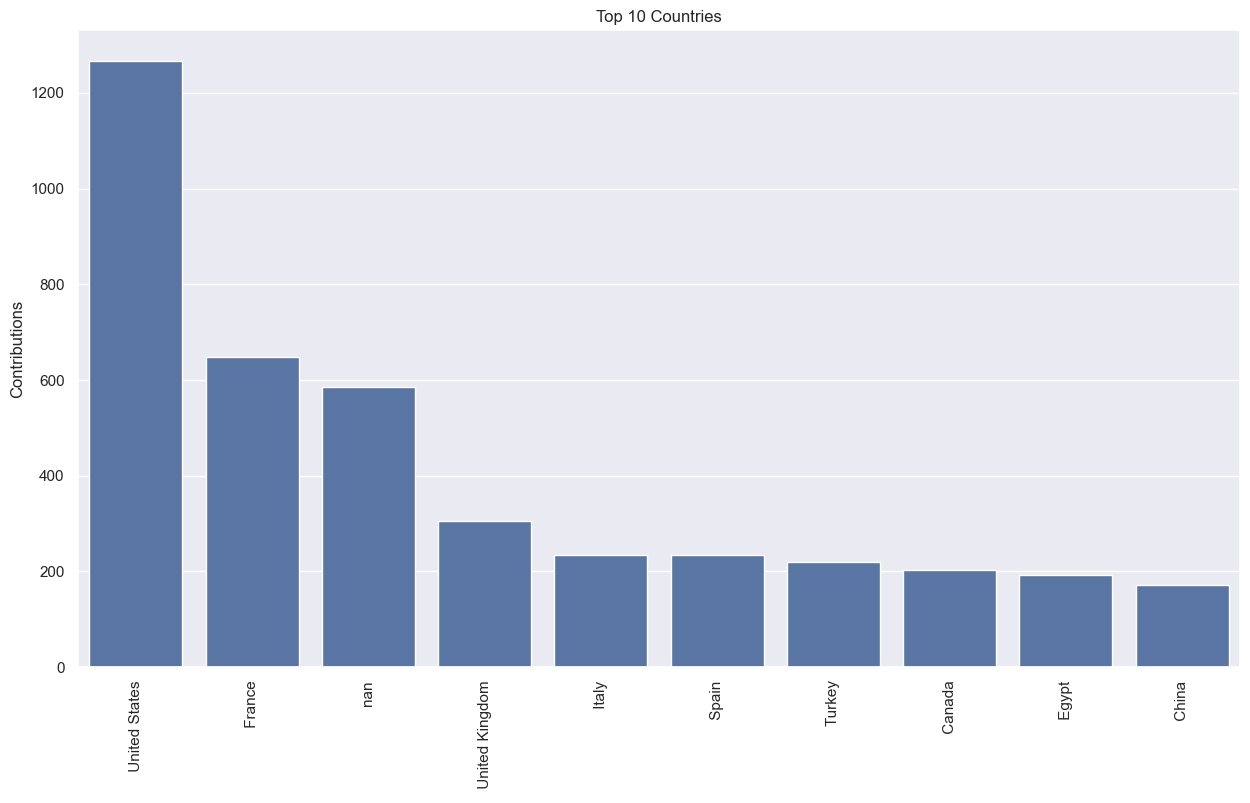

In [123]:
# Get Countires with highest Contributiuons
top_10_Countires = df.Country.value_counts()[:10]
visualize_data(top_10_Countires , caption = 'Top 10 Countries', ylabel='Contributions')

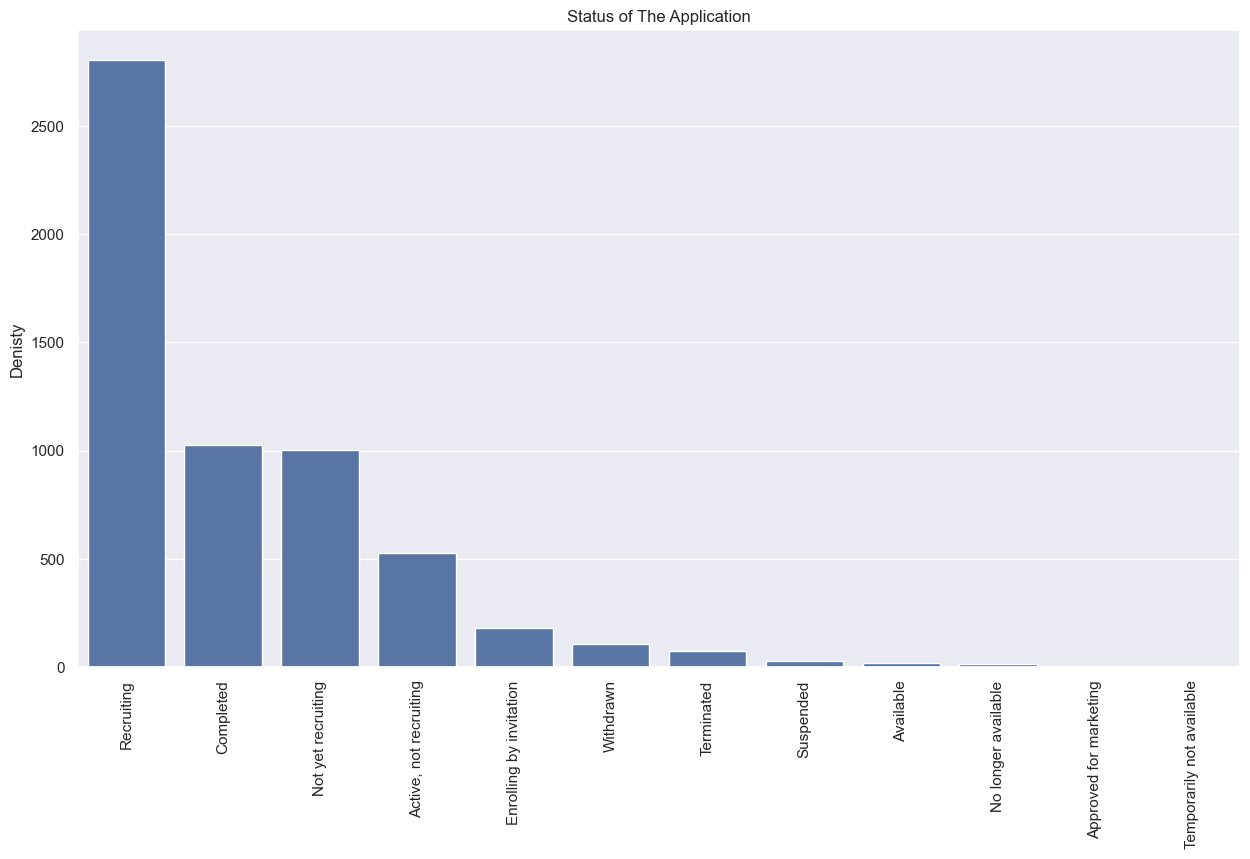

In [124]:
# Status of the Application
status = df.Status.value_counts()
visualize_data(status , caption = 'Status of The Application', ylabel='Denisty')

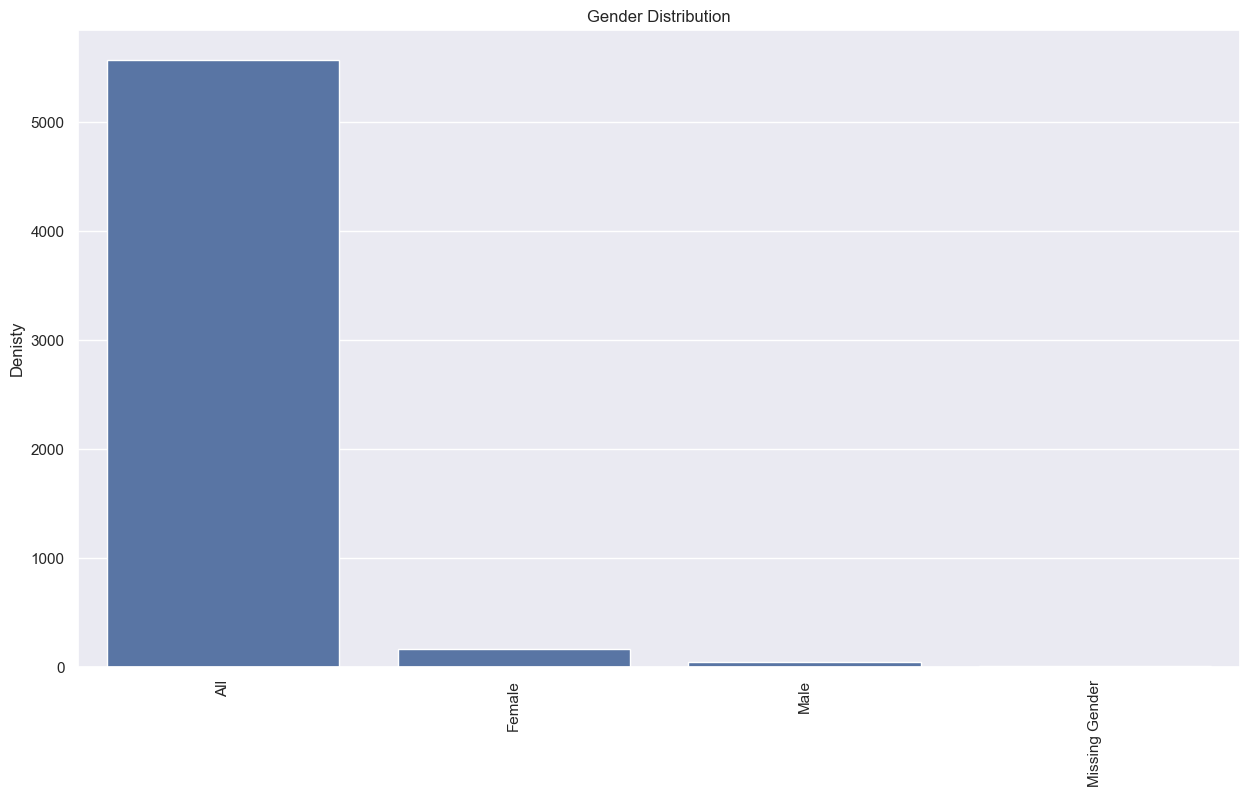

In [125]:
# Gender Visualiztions
gender = df.Gender.value_counts()
visualize_data(gender , caption = 'Gender Distribution', ylabel='Denisty')

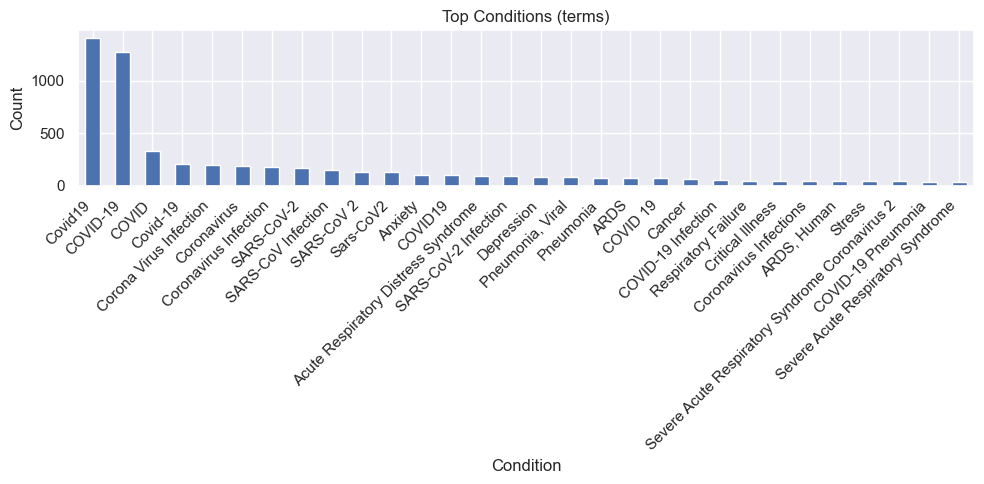


Top conditions (top 30):
Conditions
Covid19                                            1408
COVID-19                                           1275
COVID                                               333
Covid-19                                            203
Corona Virus Infection                              199
Coronavirus                                         188
Coronavirus Infection                               178
SARS-CoV-2                                          166
SARS-CoV Infection                                  151
SARS-CoV 2                                          128
Sars-CoV2                                           128
Anxiety                                             100
COVID19                                              98
Acute Respiratory Distress Syndrome                  93
SARS-CoV-2 Infection                                 89
Depression                                           85
Pneumonia, Viral                                     82
Pneumonia  

In [126]:
# Top conditions (explode multi-valued cells by common separators)
cond_series = df['Conditions'].astype(str).dropna().str.replace(r'\s*\|\s*', ';', regex=True).str.split(';')
exploded = cond_series.explode().str.strip()
top_conditions = exploded[exploded != 'nan'].value_counts().head(30)
plt.figure(figsize=(10,5))
top_conditions.plot(kind='bar')
plt.title("Top Conditions (terms)")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("\nTop conditions (top 30):")
print(top_conditions.to_string())

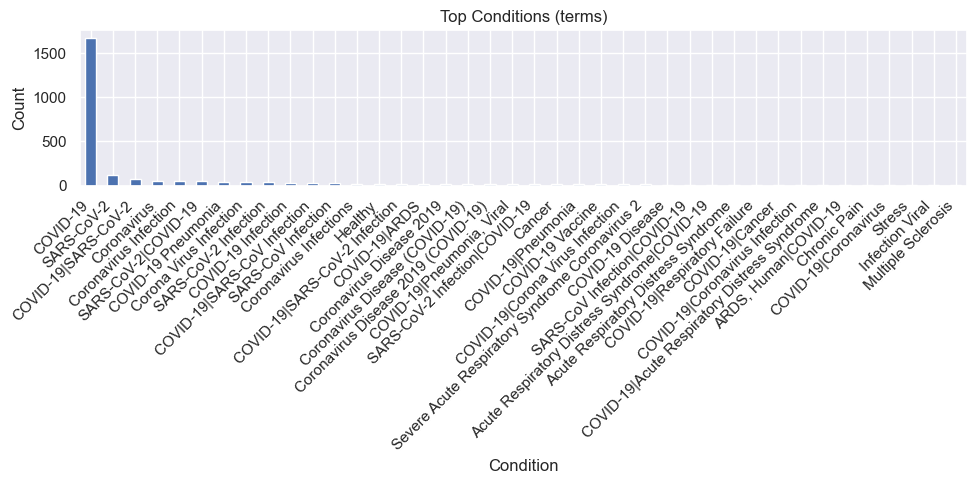


Top conditions (top 40):
conditions_norm
COVID-19                                           1673
SARS-CoV-2                                          119
COVID-19|SARS-CoV-2                                  73
Coronavirus                                          54
Coronavirus Infection                                52
SARS-CoV-2|COVID-19                                  49
COVID-19 Pneumonia                                   42
Corona Virus Infection                               38
SARS-CoV-2 Infection                                 36
COVID-19 Infection                                   31
COVID-19|SARS-CoV Infection                          25
SARS-CoV Infection                                   25
Coronavirus Infections                               18
Healthy                                              18
COVID-19|SARS-CoV-2 Infection                        17
COVID-19|ARDS                                        17
Coronavirus Disease 2019                             16
Corona

In [127]:
# Define the normalize_conditions function
def normalize_conditions(text):
    """
    Normalize condition terms using the synonym mapping
    """
    import re
    normalized = text
    for pattern, replacement in syn_map.items():
        normalized = re.sub(pattern, replacement, normalized)
    return normalized

# Dealing with repeating terms in differentt cases
syn_map = {
  r'(?i)\b(covid[-\s]?19|covid19|covid)\b': 'COVID-19',
  r'(?i)\b(sars[-\s]?cov[-\s]?2|sarscov2|sars cov 2)\b': 'SARS-CoV-2',
  r'(?i)\b(coronavirus|novel coronavirus|2019[-\s]?ncov|2019ncov|n[-\s]?cov)\b': 'Coronavirus'
}
df['conditions_norm'] = df['Conditions'].astype(str).apply(normalize_conditions)
exploded_conditions = df['conditions_norm'].str.split(';').explode().str.strip()
top_conditions = exploded_conditions.value_counts().head(40)
plt.figure(figsize=(10,5))
top_conditions.plot(kind='bar')
plt.title("Top Conditions (terms)")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("\nTop conditions (top 40):")
print(top_conditions.to_string())


Top 20 countries by unique trial count:
            Country  unique_trial_count
      United States                1267
             France                 647
                nan                 585
     United Kingdom                 306
              Italy                 235
              Spain                 234
             Turkey                 219
             Canada                 202
              Egypt                 192
              China                 171
             Brazil                 137
            Germany                 128
            Belgium                  91
             Mexico                  88
        Switzerland                  76
 Russian Federation                  69
             Sweden                  57
             Israel                  56
            Denmark                  56
              India                  55


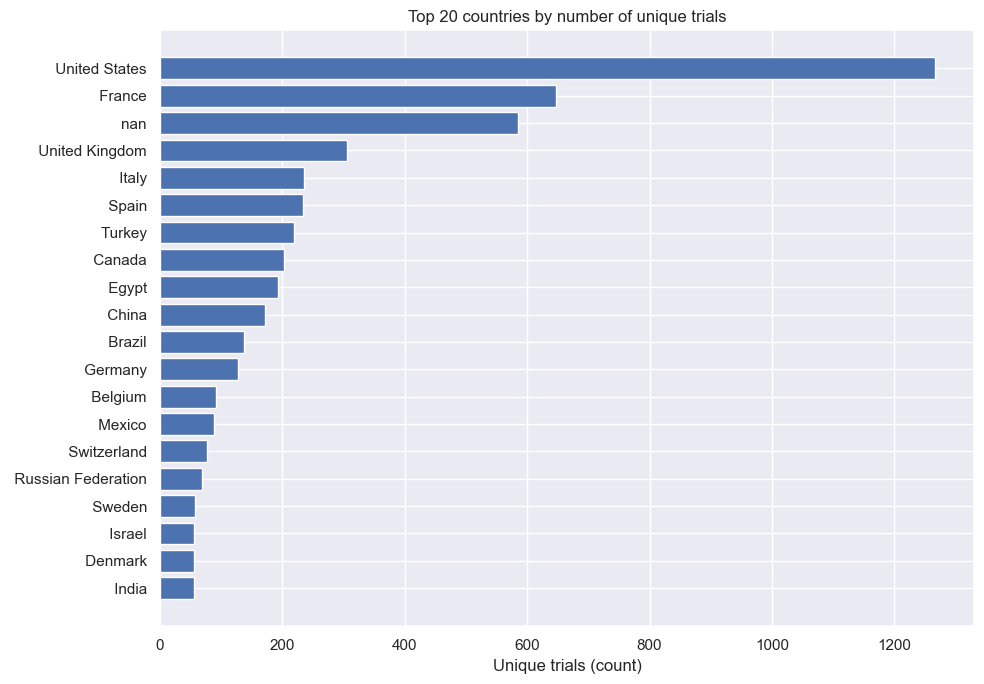

In [140]:
# Count unique trials per country (each trial counted once per country)
unique_trials_per_country = (df
                             .groupby('Country')['NCT Number']
                             .nunique()
                             .reset_index()
                             .rename(columns={'NCT Number': 'unique_trial_count'})
                             .sort_values('unique_trial_count', ascending=False))
# Print top 20 to console
top_n = 20
print("\nTop {} countries by unique trial count:".format(top_n))
print(unique_trials_per_country.head(top_n).to_string(index=False))
# Plot top N as horizontal bar chart
top_countries = unique_trials_per_country.head(top_n).copy()
plt.figure(figsize=(10, max(4, 0.35 * len(top_countries))))
plt.barh(top_countries['Country'][::-1], top_countries['unique_trial_count'][::-1])
plt.xlabel('Unique trials (count)')
plt.title(f'Top {top_n} countries by number of unique trials')
plt.tight_layout()
plt.show()

Univariate Analysis

Status
Recruiting                   2805
Completed                    1025
Not yet recruiting           1004
Active, not recruiting        526
Enrolling by invitation       181
Withdrawn                     107
Terminated                     74
Suspended                      27
Available                      19
No longer available            12
Approved for marketing          2
Temporarily not available       1
Name: count, dtype: int64


<Axes: title={'center': 'Status of Clinical Trials'}, xlabel='Status'>

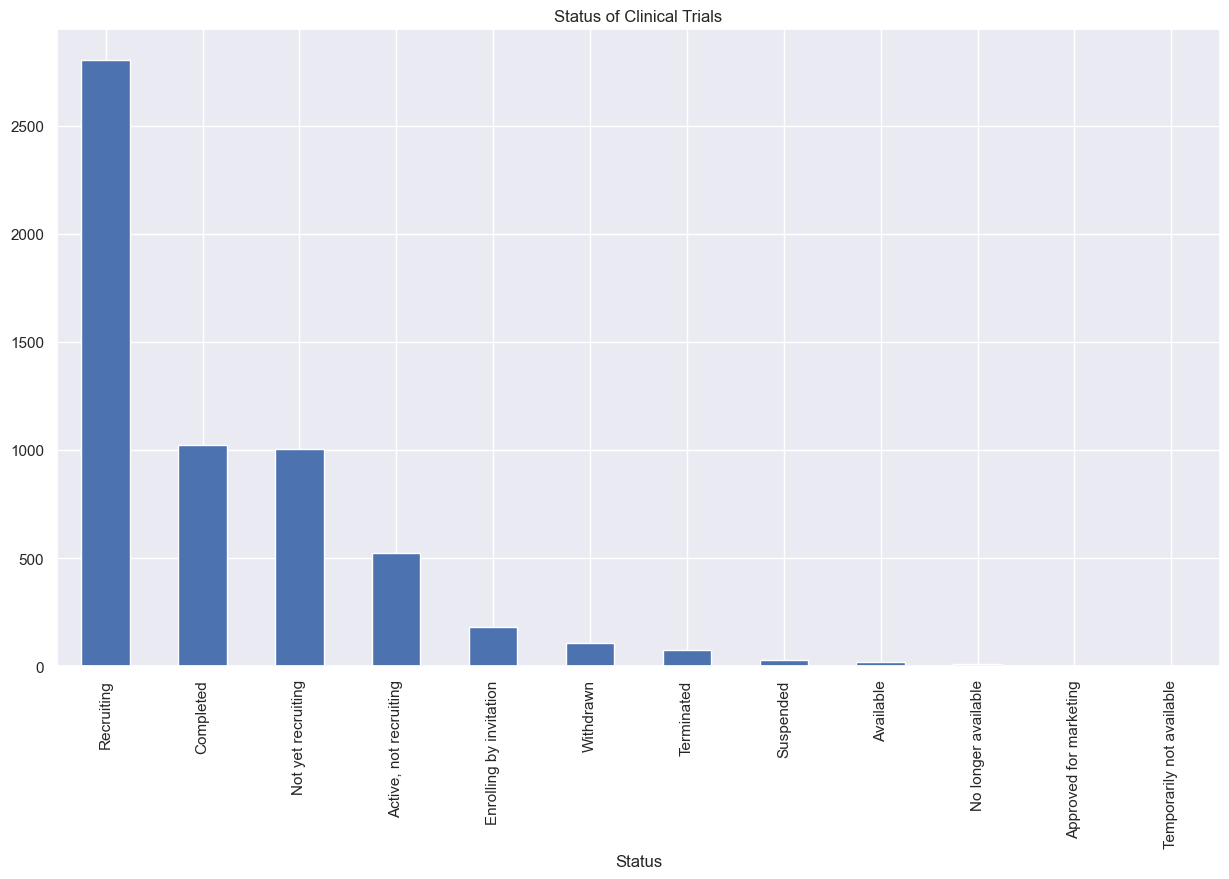

In [128]:
#Status Distribution
print(df['Status'].value_counts())
df['Status'].value_counts().plot(kind='bar', title='Status of Clinical Trials')

Phases
Missing Phases     2461
Not Applicable     1354
Phase 2             685
Phase 3             450
Phase 1             234
Phase 2|Phase 3     200
Phase 1|Phase 2     192
Phase 4             161
Early Phase 1        46
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Phases'}, xlabel='Phases'>

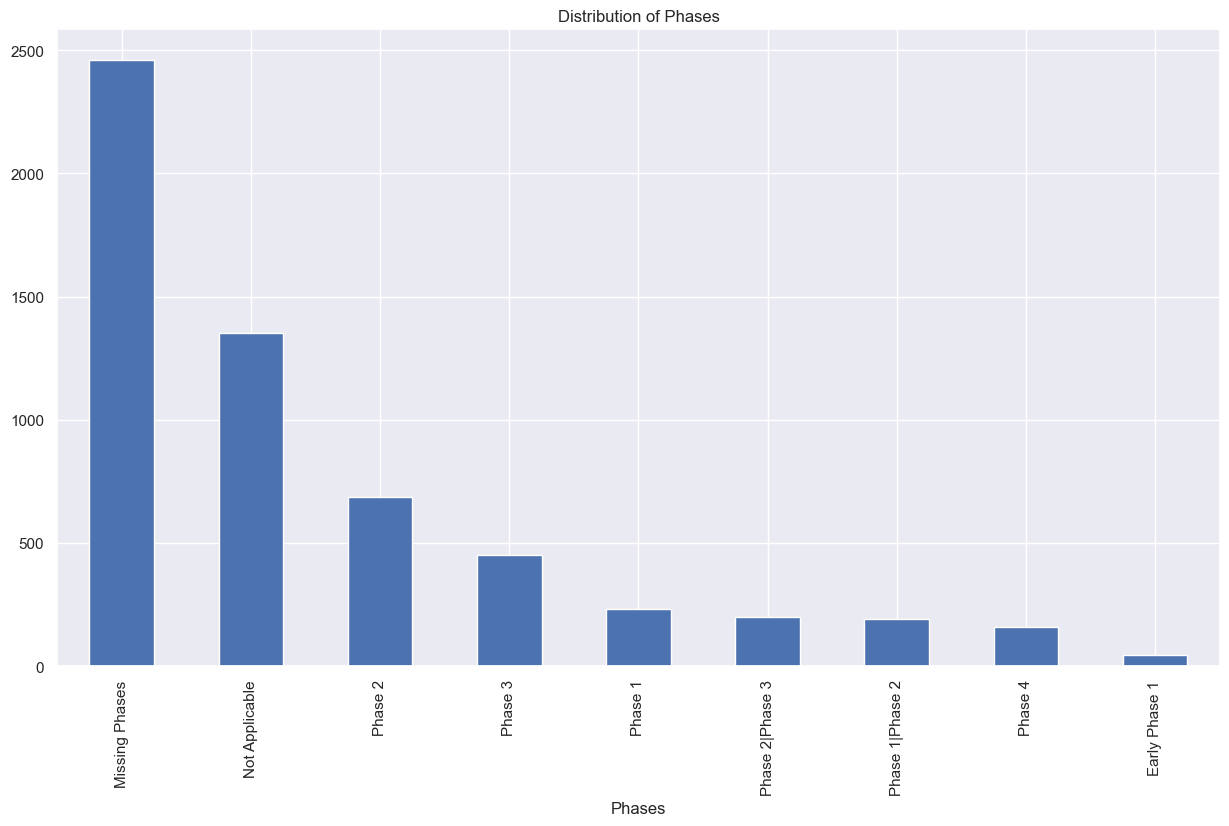

In [129]:
#Phase Distribution
print(df['Phases'].value_counts())
df['Phases'].value_counts().plot(kind='bar', title='Distribution of Phases')

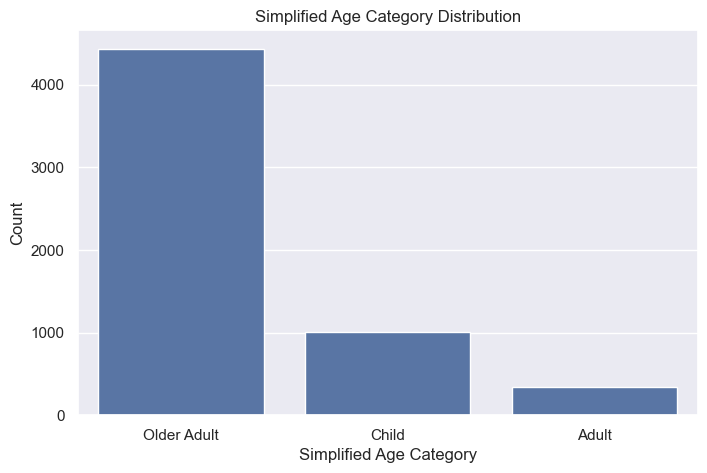

In [130]:
#Age group Analysis
# Function to simplify Age categories
def simplify_age_category(age_text):
    age_text = str(age_text).lower()
    if "child" in age_text:
        return "Child"
    elif "older adult" in age_text or "65" in age_text or "75" in age_text or "80" in age_text:
        return "Older Adult"
    elif "adult" in age_text or "18" in age_text:
        return "Adult"
    else:
        return "Other"

# Create new column
df["Age_simplified"] = df["Age"].apply(simplify_age_category)

# Value counts
age_simplified_counts = df["Age_simplified"].value_counts()

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=age_simplified_counts.index, y=age_simplified_counts.values)

plt.title("Simplified Age Category Distribution")
plt.xlabel("Simplified Age Category")
plt.ylabel("Count")
plt.show()


Study type distribution:
study_type_class
Interventional    3322
Observational     2427
Other               34

Interventional vs Observational stats:
                  n_studies  median_enrollment  mean_enrollment  median_duration_days  mean_duration_days
study_type_class                                                                                         
Interventional         3322              108.0      8194.665563                 108.0         8194.665563
Observational          2427              300.0     32178.022662                 300.0        32178.022662


<Figure size 700x400 with 0 Axes>

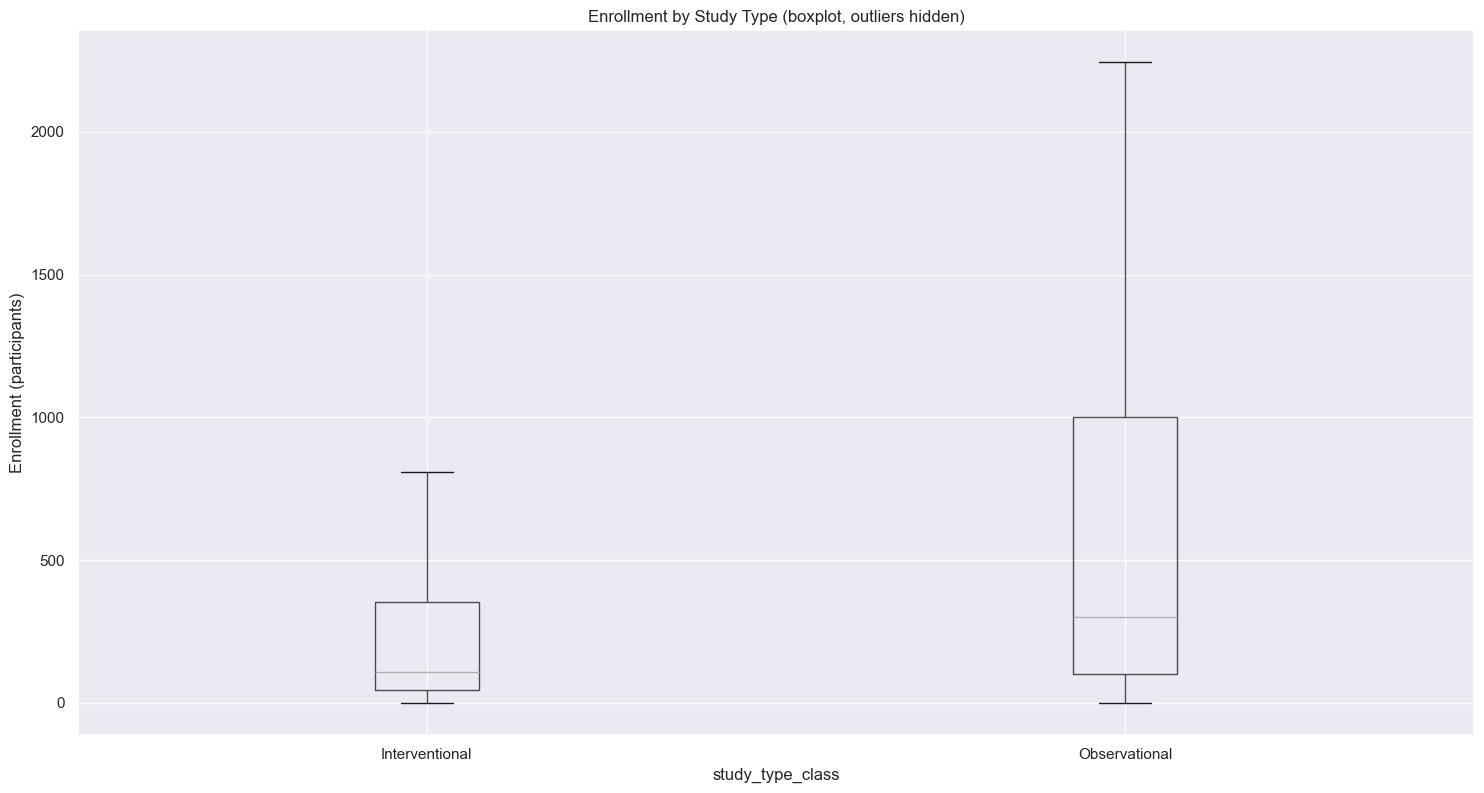

In [139]:
# ---Interventional vs Observational comparisons ------------------------
# Try to detect a study-type/design field and classify
def classify_study_type(v):
    if pd.isna(v):
        return np.nan
    s = str(v).lower()
    if 'intervent' in s:
        return 'Interventional'
    if 'observ' in s:
        return 'Observational'
    if 'intervent' in s and 'observ' in s:
        return 'Mixed'
    return 'Other'


df['study_type_raw'] = df['Study Type'].astype(str).replace('nan', np.nan)
df['study_type_class'] = df['study_type_raw'].apply(classify_study_type)
print("\nStudy type distribution:")
print(df['study_type_class'].value_counts(dropna=False).to_string())
subset = df[df['study_type_class'].isin(['Interventional','Observational'])]
if not subset.empty:
    stats = subset.groupby('study_type_class').agg(
        n_studies = ('Enrollment','count'),
        median_enrollment = ('Enrollment','median'),
        mean_enrollment = ('Enrollment','mean'),
        median_duration_days = ('Enrollment','median'),
        mean_duration_days = ('Enrollment','mean')
    )
    print("\nInterventional vs Observational stats:")
    print(stats.to_string())
    # boxplot (enrollment)
    if subset['Enrollment'].notna().any():
        plt.figure(figsize=(7,4))
        subset.boxplot(column='Enrollment', by='study_type_class', showfliers=False)
        plt.suptitle('')
        plt.title('Enrollment by Study Type (boxplot, outliers hidden)')
        plt.ylabel('Enrollment (participants)')
        plt.tight_layout()
        plt.show()
    else:
        print("No Interventional/Observational rows detected after classification.")
else:
    print("\nNo Study Type / Study Design column detected; cannot classify Interventional vs Observational.")

Bivariate Analysis

Status           Active, not recruiting  Approved for marketing  Available  \
Phases                                                                       
Early Phase 1                         7                       0          0   
Missing Phases                      175                       2         19   
Not Applicable                      111                       0          0   
Phase 1                              44                       0          0   
Phase 1|Phase 2                      26                       0          0   
Phase 2                              81                       0          0   
Phase 2|Phase 3                      15                       0          0   
Phase 3                              59                       0          0   
Phase 4                               8                       0          0   

Status           Completed  Enrolling by invitation  No longer available  \
Phases                                                           

<Axes: title={'center': 'Status vs. Phases'}, xlabel='Phases'>

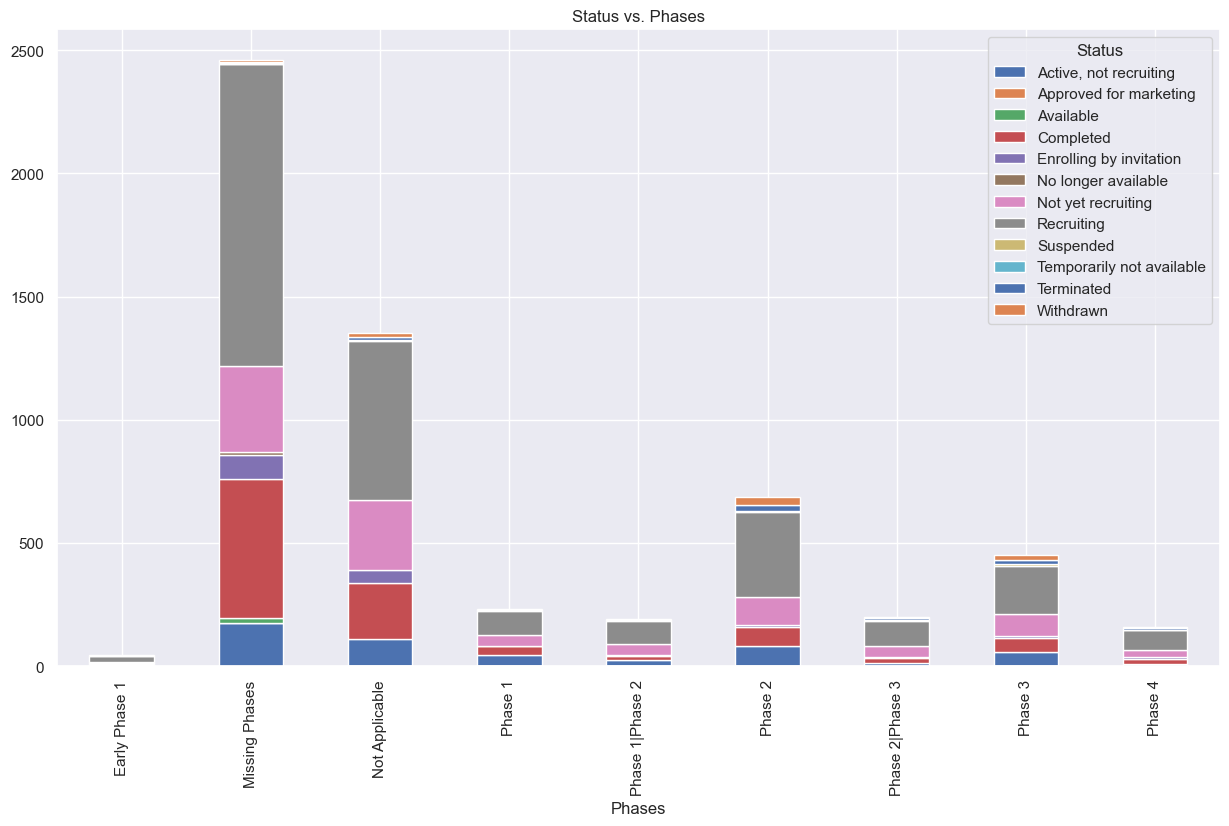

In [131]:
# Status vs Phase
status_phase = pd.crosstab(df['Phases'], df['Status'])
print(status_phase)
status_phase.plot(kind='bar', stacked=True, title='Status vs. Phases')

In [132]:
#Conditions vs Outcome Measures
conditions_outcomes = df.groupby('Conditions')['Outcome Measures'].apply(lambda x: ''.join([str(item) for item in x])).reset_index()
print(conditions_outcomes)

                                             Conditions  \
0                                2019 Novel Coronavirus   
1                      2019 Novel Coronavirus Infection   
2     2019 Novel Coronavirus Infection|COVID-19 Viru...   
3                      2019 Novel Coronavirus Pneumonia   
4             2019 Novel Coronavirus Pneumonia|COVID-19   
...                                                 ...   
3062                  the Lung Complication of COVID-19   
3063  the Prognostic Value of Ferritin|Glycosylated ...   
3064  the Study Focus on the Uses of Telephone and O...   
3065  the Use of Modern Technology Applications in H...   
3066  to Predict an Unfavorable Evolution of Covid-1...   

                                       Outcome Measures  
0     Proportion of participants who improve by at l...  
1     new-onset COVID-19|Number of Participants with...  
2     Number of participants with treatment emergent...  
3     Clinical recovery time|Complete fever time|Cou...  
4

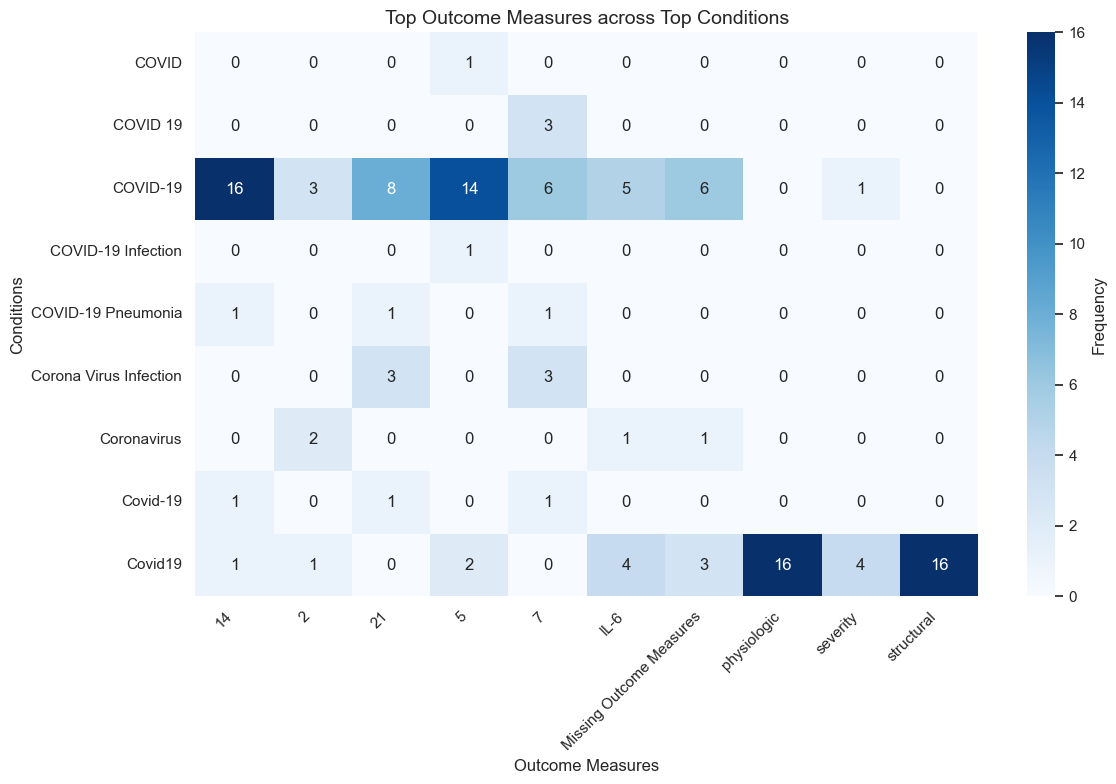

In [133]:
condition_col = "Conditions"
outcome_col = "Outcome Measures"
TOP_CONDITIONS = 10
TOP_OUTCOMES = 10

# Convert all values to string first, then split
# This handles the case where some values are floats
df[outcome_col] = df[outcome_col].astype(str)

# Split outcome measures into list (handles comma-separated)
df[outcome_col] = df[outcome_col].apply(lambda x: [i.strip() for i in x.split(",") if i.strip()])

# Explode so each row is (Condition, Outcome Measure)
exploded = df.explode(outcome_col)

# Count frequency of outcome measures per condition
condition_outcome_counts = (
    exploded.groupby([condition_col, outcome_col])
    .size()
    .reset_index(name="Count")
)

# Find top conditions and outcomes
top_conditions = condition_outcome_counts.groupby(condition_col)["Count"].sum().nlargest(TOP_CONDITIONS).index
top_outcomes = condition_outcome_counts.groupby(outcome_col)["Count"].sum().nlargest(TOP_OUTCOMES).index

# Filter only top ones
filtered = condition_outcome_counts[
    condition_outcome_counts[condition_col].isin(top_conditions) &
    condition_outcome_counts[outcome_col].isin(top_outcomes)
]

# Pivot into matrix
pivot_table = filtered.pivot(index=condition_col, columns=outcome_col, values="Count").fillna(0)

# === Plot heatmap ===
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Blues", cbar_kws={'label': 'Frequency'})
plt.title("Top Outcome Measures across Top Conditions", fontsize=14)
plt.xlabel("Outcome Measures")
plt.ylabel("Conditions")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

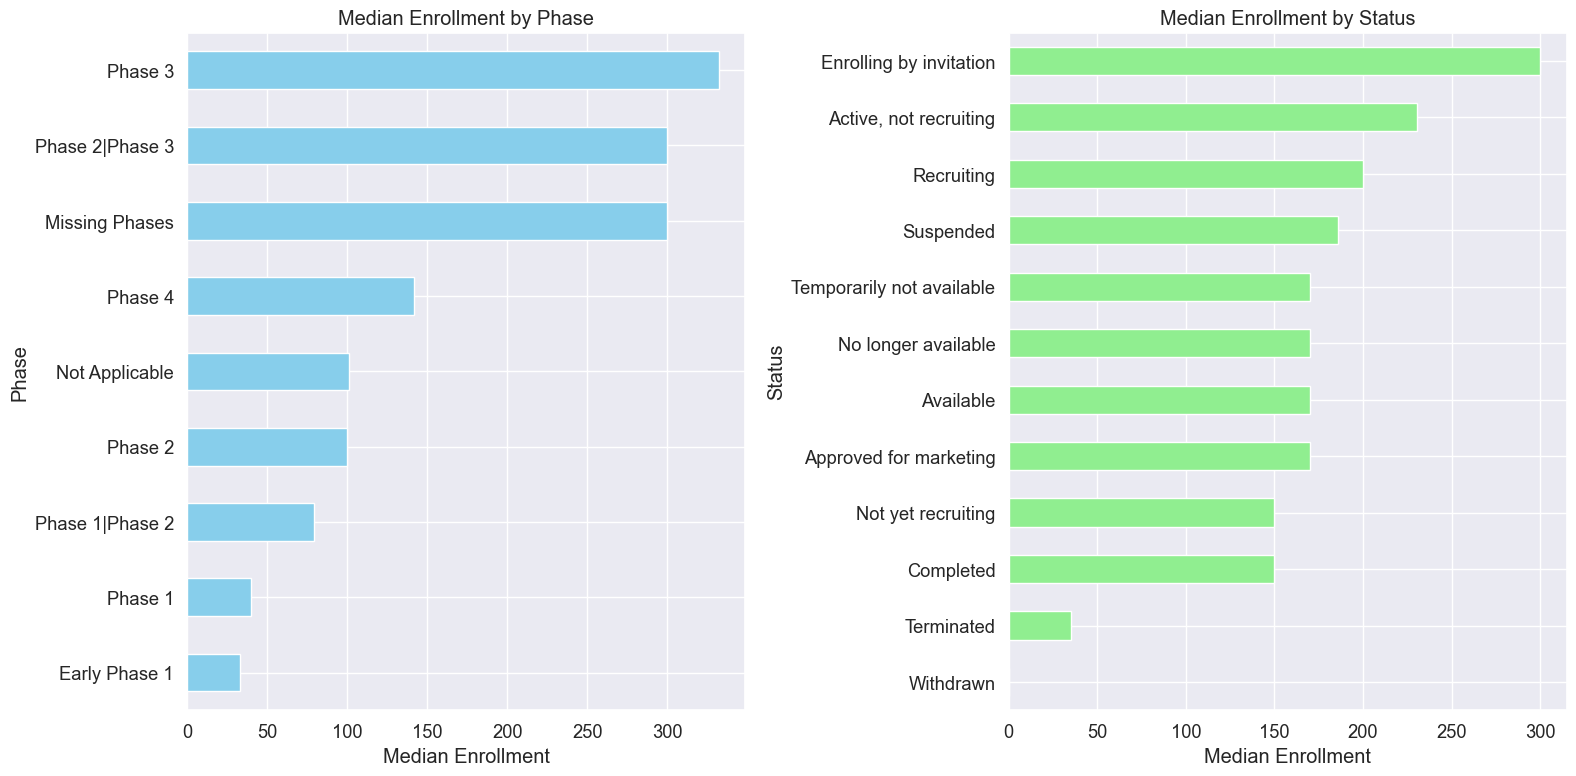

In [134]:
# First, define the enrollment_to_number function
def enrollment_to_number(enrollment):
    # This is a placeholder implementation
    # You need to replace this with your actual conversion logic
    try:
        # Try to convert the enrollment to a number
        return float(enrollment)
    except (ValueError, TypeError):
        # Handle cases where enrollment can't be converted to a number
        return 0  # or another default value, or np.nan

# Now use the function
df['enrollment_num'] = df['Enrollment'].apply(enrollment_to_number)
med_by_phase = df.groupby(df['Phases'])['enrollment_num'].median()
med_by_status = df.groupby(df['Status'])['enrollment_num'].median()

# Set the style for the plots
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# Horizontal bar charts for better readability with long labels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Horizontal bar for phase
med_by_phase.sort_values().plot(kind='barh', ax=ax1, color='skyblue')
ax1.set_title('Median Enrollment by Phase')
ax1.set_xlabel('Median Enrollment')
ax1.set_ylabel('Phase')

# Plot 2: Horizontal bar for status
med_by_status.sort_values().plot(kind='barh', ax=ax2, color='lightgreen')
ax2.set_title('Median Enrollment by Status')
ax2.set_xlabel('Median Enrollment')
ax2.set_ylabel('Status')

plt.tight_layout()
plt.show()

Time Series Analysis

In [135]:
# Convert date columns to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Primary Completion Date'] = pd.to_datetime(df['Primary Completion Date'], errors='coerce')

<Axes: title={'center': 'Trials Started Over Time'}, xlabel='Start Date'>

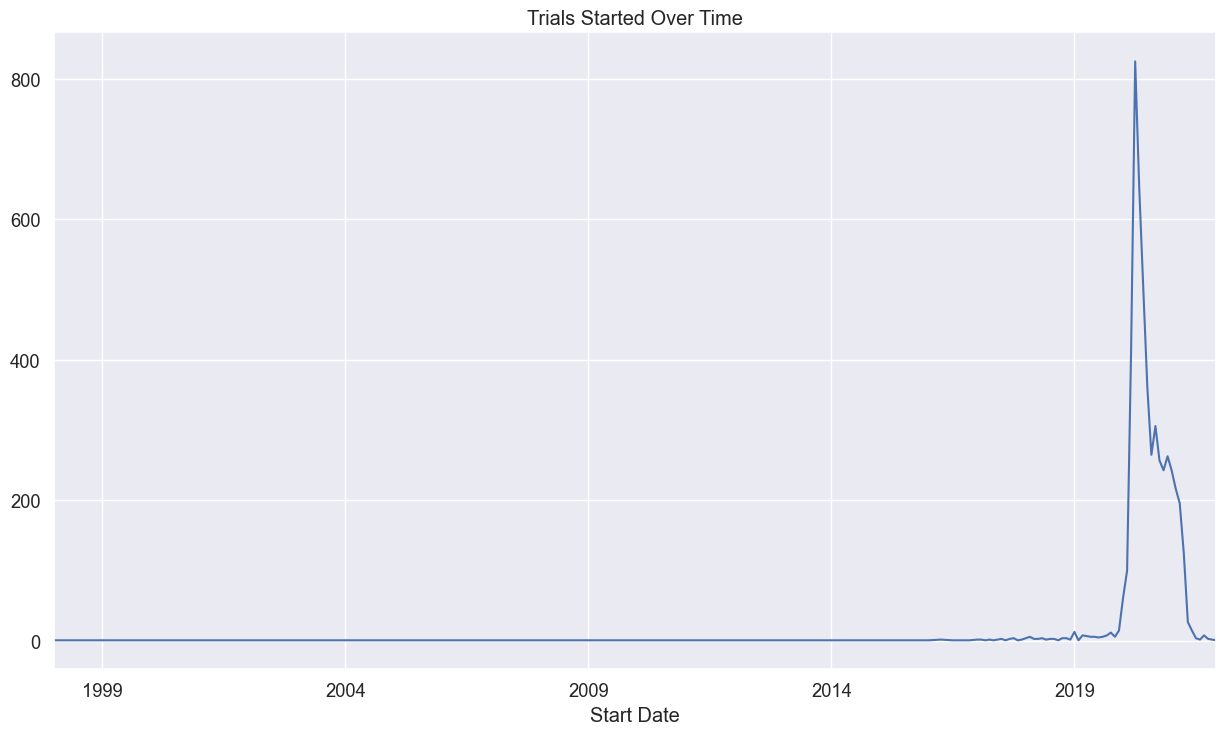

In [136]:
# Plot the number of trials started over time
df['Start Date'].dt.to_period('M').value_counts().sort_index().plot(kind='line', title='Trials Started Over Time')

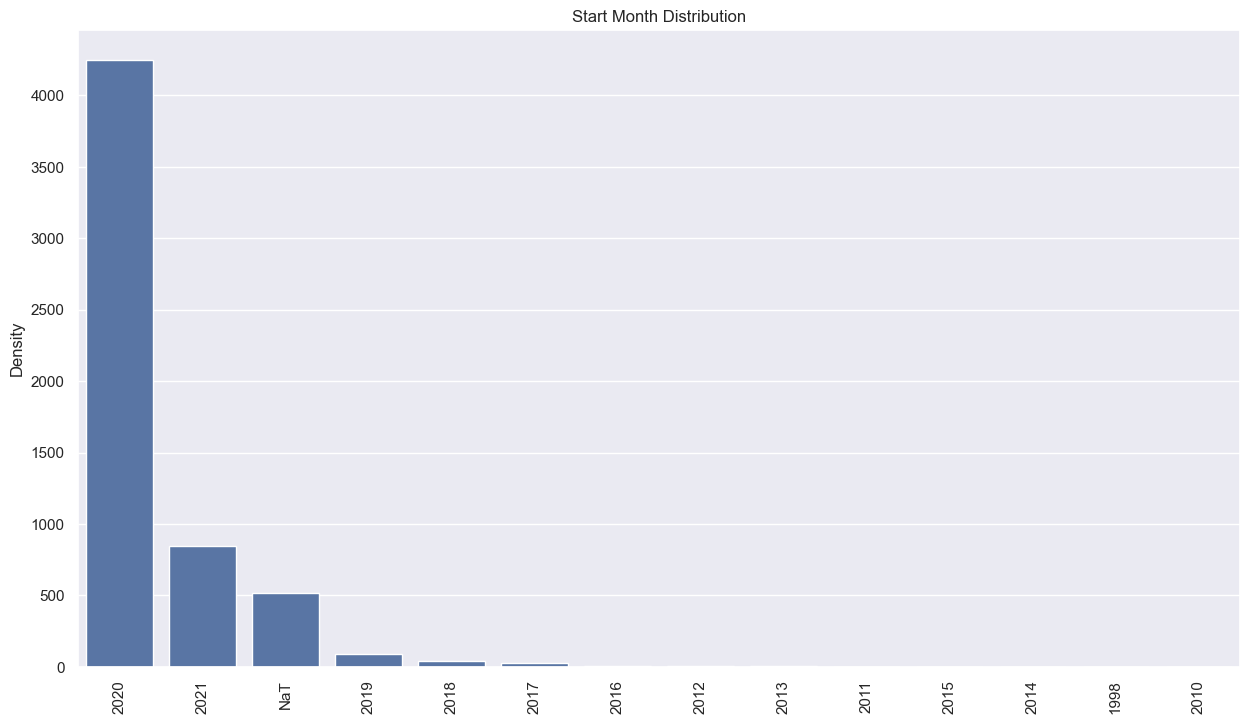

In [137]:
# Which month has the highest start
start_month = pd.Series([str(df['Start Date'].iloc[i]).split('-')[0] for i in range(df.shape[0])])
start_month_Distribution = start_month.value_counts()
visualize_data(start_month_Distribution, caption='Start Month Distribution', ylabel='Density')

In [141]:
# Save the cleaned data
df.to_csv('cleaned_covid_clinical_trials.csv', index=False)